### **Image Classification Using Cross Correlation**

In [1]:
import numpy as np
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab.patches import cv2_imshow

In [4]:
target_path = 'drive/MyDrive/assignment4_dataset/target'
template_path = 'drive/MyDrive/assignment4_dataset/template'

In [5]:
# looking for the data
base_path_for_samples = target_path + '/Q/'

In [6]:
import os

q_images = os.listdir(base_path_for_samples)
q_template = template_path + '/Q.png'

In [7]:
print(q_images)

['Q501.jpg', 'Q2701.jpg', 'Q1201.jpg', 'Q1801.jpg', 'Q2301.jpg', 'Q1001.jpg', 'Q2501.jpg', 'Q401.jpg', 'Q1401.jpg', 'Q201.jpg', 'Q1701.jpg', 'Q2201.jpg', 'Q1501.jpg', 'Q1601.jpg', 'Q901.jpg', 'Q801.jpg', 'Q701.jpg', 'Q2001.jpg', 'Q2601.jpg', 'Q301.jpg', 'Q1901.jpg', 'Q1.jpg', 'Q2401.jpg', 'Q101.jpg', 'Q2801.jpg', 'Q2901.jpg', 'Q1101.jpg', 'Q2101.jpg', 'Q1301.jpg', 'Q601.jpg']


In [8]:
q_temp_img = cv2.imread(q_template, cv2.IMREAD_GRAYSCALE)
q_sample_img = cv2.imread(base_path_for_samples + str(q_images[0]), cv2.IMREAD_GRAYSCALE)
print(base_path_for_samples + str(q_images[0]))

drive/MyDrive/assignment4_dataset/target/Q/Q501.jpg


In [9]:
print(q_temp_img.shape, q_sample_img.shape)

(146, 185) (200, 200)


In [10]:
# checking are all templates' shapes same
for i in range(len(q_images)):
  print(cv2.imread(base_path_for_samples + str(q_images[i])).shape)

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


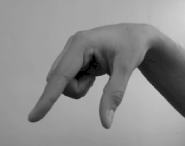

In [11]:
cv2_imshow(q_temp_img)

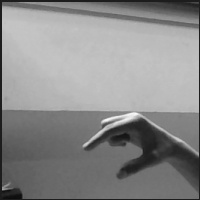

In [12]:
cv2_imshow(q_sample_img)

In [64]:
def normalised_cross_correlation(sample, template):
    # Normalised Cross Correlation Equation
    cor = np.sum(sample * template)
    nor = np.sqrt((np.sum(sample**2))) * np.sqrt(np.sum(template**2))
    return cor

Looking TEMP on SAMPLE
(sample > template)


In [14]:
def template_matching(template, sample):
    """
    Finding best locations by overlapping images to get best ncc score
    Returns:
      max matching score and location of smaller image on bigger one
    """
    
    (max_Y, max_X) = (0, 0)
    max_val = 0

    if np.max(sample) <= 1 or np.max(template):
      sample = cv2.normalize(sample, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
      template = cv2.normalize(template, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

    # Set image, target and result value matrix
    template = np.array(template, dtype = "int")
    sample = np.array(sample, dtype = "int")

    height, width = template.shape
    sample_height, sample_width = sample.shape

    ncc_value = np.zeros((abs(sample_height - height) + 1, abs(sample_width - width) + 1))
    
    for y in range(0, 54):
        for x in range(0, 14):
            temporary = sample[y: height + y, x: width + x]
            # calculate ncc value

            ncc_value[y, x] = normalised_cross_correlation(template, temporary)

            # find the most match area
            if ncc_value[y, x] > max_val:
                max_val = ncc_value[y,x]
                (max_Y, max_X) = (y, x)

    return (max_val, max_X, max_Y)

In [15]:
print(template_matching(q_temp_img, q_sample_img))

(0.903276331914032, 2, 53)


In [16]:
from collections import defaultdict

In [17]:
import string
alphabet = list(string.ascii_uppercase)

In [18]:
def get_samples(samples_path):
  '''
  Retrieves references of sample images
  Returns:
    paths all of the images
  '''

  samples = defaultdict(list)
  for letter in alphabet:
    image_files = os.listdir(samples_path + f'/{letter}')

    for image in image_files:
      image_with_path = samples_path + f'/{letter}/' + image
      samples[letter].append(image_with_path)

  return samples

In [19]:
target_path = 'drive/MyDrive/assignment4_dataset/target'
samples = get_samples(target_path)
samples

defaultdict(list,
            {'A': ['drive/MyDrive/assignment4_dataset/target/A/A2101.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A401.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A901.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1101.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A201.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A101.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1001.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A501.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1801.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1701.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A2901.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A2201.jpg',
              'drive/MyDrive/assignment4_dataset/target/A/A1601.jpg',
     

In [20]:
def get_templates(template_path):
  '''
  Retrieves references of template images
  Returns:
    paths all of the images
  '''

  templates = defaultdict(str)
  image_file = os.listdir(template_path)

  for i in range(len(alphabet)):
    img_path = template_path + '/' + image_file[i]
    templates[alphabet[i]] = img_path

  return templates  

In [21]:
template_path = 'drive/MyDrive/assignment4_dataset/template'
templates = get_templates(template_path)
templates

defaultdict(str,
            {'A': 'drive/MyDrive/assignment4_dataset/template/A.png',
             'B': 'drive/MyDrive/assignment4_dataset/template/B.png',
             'C': 'drive/MyDrive/assignment4_dataset/template/C.png',
             'D': 'drive/MyDrive/assignment4_dataset/template/D.png',
             'E': 'drive/MyDrive/assignment4_dataset/template/E.png',
             'F': 'drive/MyDrive/assignment4_dataset/template/F.png',
             'G': 'drive/MyDrive/assignment4_dataset/template/G.png',
             'H': 'drive/MyDrive/assignment4_dataset/template/H.png',
             'I': 'drive/MyDrive/assignment4_dataset/template/I.png',
             'J': 'drive/MyDrive/assignment4_dataset/template/J.png',
             'K': 'drive/MyDrive/assignment4_dataset/template/K.png',
             'L': 'drive/MyDrive/assignment4_dataset/template/L.png',
             'M': 'drive/MyDrive/assignment4_dataset/template/M.png',
             'N': 'drive/MyDrive/assignment4_dataset/template/N.png',
   

In [22]:
def classify(templates, samples):
  """
  Getting all samples and templates then
  Comparing all samples with templates 
  Predicting a label according to the matching score
  Return list of tuples as labels, score and image location
  """
  alphabet = list(string.ascii_uppercase)

  result = set()

  for letter in alphabet:

    images = samples[letter]

    for image in images:
      
      img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
      score = 0
      actual_label = letter
      predicted_label = ''

      for kt, template in templates.items():

        temp = cv2.imread(template, cv2.IMREAD_GRAYSCALE)

        in_score = template_matching(temp, img)[0]

        if in_score > score:
          score = in_score
          predicted_label = kt

      res = (actual_label, predicted_label, score, image)
      result.add(res)

  return result

In [23]:
results = classify(templates, samples)

In [ ]:
cnt = 0
for res in results:

  if res[0] == res[1]:
    cnt+=1

print(cnt/len(results))

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(results, columns=['actual_label', 'predicted_label', 'score', 'image'])

In [ ]:
df.head()

In [ ]:
most_correlated_pairs = df.sort_values(by=['score'], ascending = False).head()

In [ ]:
most_correlated_pairs

In [ ]:
for _, row in most_correlated_pairs.iterrows():
  temp_path = templates[row['predicted_label']]
  temp = cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE)
  img = cv2.imread(row['image'], cv2.IMREAD_GRAYSCALE)
  s, x, y = template_matching(temp, img)
  height, width = temp.shape
  img = img[y:y+height, x:x+width]


  merged = np.hstack([temp, img])
  cv2_imshow(merged)


In [26]:
sample_for_hog = cv2.imread('drive/MyDrive/assignment4_dataset/target/Z/Z901.jpg', cv2.IMREAD_GRAYSCALE)
sample_for_hog = cv2.medianBlur(sample_for_hog, 5)
hog = cv2.HOGDescriptor()
th3 = cv2.adaptiveThreshold(sample_for_hog, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = hog.compute(th3)
th3

array([0.16854724, 0.06616786, 0.19799924, ..., 0.        , 0.        ,
       0.36980498], dtype=float32)

TRYING HOG BEFORE APPLY ENTIRE DATASET

In [27]:
hog = cv2.HOGDescriptor()

imx = cv2.imread('drive/MyDrive/assignment4_dataset/target/U/U2701.jpg', cv2.IMREAD_GRAYSCALE)
imx = cv2.medianBlur(imx, 5)
imx = cv2.adaptiveThreshold(imx, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
imx = hog.compute(imx)


imy = cv2.imread('drive/MyDrive/assignment4_dataset/target/W/W1001.jpg', cv2.IMREAD_GRAYSCALE)
imy = cv2.medianBlur(imy, 5)
imy = cv2.adaptiveThreshold(imy, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
imy = hog.compute(imy)


imz = cv2.imread('drive/MyDrive/assignment4_dataset/target/Z/Z801.jpg', cv2.IMREAD_GRAYSCALE)
imz = cv2.medianBlur(imz, 5)
imz = cv2.adaptiveThreshold(imz, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
imz = hog.compute(imz)


print(np.linalg.norm(imx - th3))
print(np.linalg.norm(imy - th3))
print(np.linalg.norm(imz - th3))

114.54516
122.69106
112.00061


In [28]:
def template_matching_with_hog(template, sample):
  """
  Comparing two images using euclidian distances on hog vectors
  """
  hog = cv2.HOGDescriptor()

  height, width = template.shape
  sample_height, sample_width = sample.shape
  
  t = hog.compute(template)

  min_val = float('inf')
  for y in range(54):
    for x in range(14):

      temporary = sample[y: y + height, x : x + width]
      s = hog.compute(temporary)
      scr = np.linalg.norm(t - s)


      if scr < min_val:
        min_val = scr
  
  return round(min_val, 3)

In [29]:
def hog_classify(templates, samples):
  """
  Compare all the samples to the alphabet templates to find best match
  """

  alphabet = list(string.ascii_uppercase)
  result = set()


  for letter in alphabet:

    for image in samples[letter]:
      
      img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
      img = cv2.medianBlur(img, 5)
      img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    

      score = float('inf')

      actual_label = letter
      predicted_label = ''

      for kt, template in templates.items():

        template = cv2.imread(template, cv2.IMREAD_GRAYSCALE)
        template = cv2.medianBlur(template, 5)
        template = cv2.adaptiveThreshold(template, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        in_score = template_matching_with_hog(template, img)
        
        if in_score < score:
          score = in_score
          predicted_label = kt

      res = (actual_label, predicted_label, score, image)
      print(res)
      result.add(res)

  return result

In [ ]:
hog_results = hog_classify(templates, samples)

In [ ]:
cnt = 0
for res in hog_results:

  if res[0] == res[1]:
    cnt+=1

print(cnt/len(hog_results))

In [31]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

In [66]:
def hog_img(img):
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
  return hog_image

In [87]:
def hog_with_cc(samples, templates):

  for ks, sample in samples.items():

    true_predicted = 0

    for smp in sample:

      img = cv2.imread(smp)
      img = cv2.resize(img, (32, 32))
      hogimg = hog_img(img)
      actual_label = ks
      predicted_label = ''

      score = 0

      for key, val in templates.items():
        tmp = cv2.imread(val, cv2.IMREAD_GRAYSCALE)
        tmp = cv2.resize(tmp, (32, 32))
        hogtmp = hog_img(tmp)

        scr = normalised_cross_correlation(hogimg, hogtmp)
        if scr > score:
          score = scr
          predicted_label = key

      if predicted_label == actual_label:
        true_predicted += 1

      print('x', end=' ')

    print(f"{ks} harfi için accuracy = {round(true_predicted / len(sample), 3)}")

In [88]:
hog_with_cc(samples, templates)

x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x A harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x B harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x C harfi için accuracy = 0.033
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x D harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x E harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x F harfi için accuracy = 0.133
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x G harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x H harfi için accuracy = 0.3
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x I harfi için accuracy = 0.0
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x J harfi için accuracy = 0.267
x x x x x x x x x x x x x x x x x x x x x x x x x x x x x x K harfi için accuracy = 0.0
x x x x x x x x x x x x x 

In [89]:
mclwh = ['drive/MyDrive/assignment4_dataset/template/H.png',
         'drive/MyDrive/assignment4_dataset/template/P.png',
         'drive/MyDrive/assignment4_dataset/template/Q.png',]

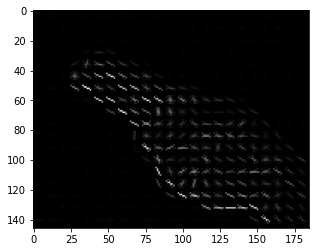

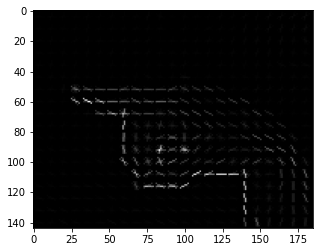

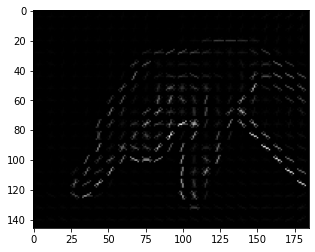

In [90]:
for t in mclwh:
  img = cv2.imread(t, cv2.IMREAD_GRAYSCALE)

  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)

  plt.imshow(hog_image, cmap="gray")
  plt.show()